**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the data into the dataframe**

In [2]:
df = pd.read_csv('models/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


**Attribute Information:**

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
target

The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
#Number of rows and columns in the dataset
df.shape

(1025, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# checking the distribution of target variable

df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [11]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


**Data visualization**

In [12]:
# Create blood pressure (trestbps) ranges
bins = [94, 120, 140, 160, 200]  # Define range bins
label = ['94-120', '121-140', '141-160', '161-200']  # Corresponding labels

df1 = pd.DataFrame()
df1['bp_range'] = pd.cut(df['trestbps'], bins=bins, labels=label, include_lowest=True)
df1['target'] = df['target']

# Count of disease occurrences by blood pressure range and target
disease_counts = df1.groupby(['bp_range', 'target'], observed=False).size().unstack()

print(df1)
print(disease_counts)

     bp_range  target
0     121-140       0
1     121-140       0
2     141-160       0
3     141-160       0
4     121-140       0
...       ...     ...
1020  121-140       1
1021  121-140       0
1022   94-120       0
1023   94-120       1
1024   94-120       0

[1025 rows x 2 columns]
target      0    1
bp_range          
94-120    138  191
121-140   229  250
141-160    93   72
161-200    39   13


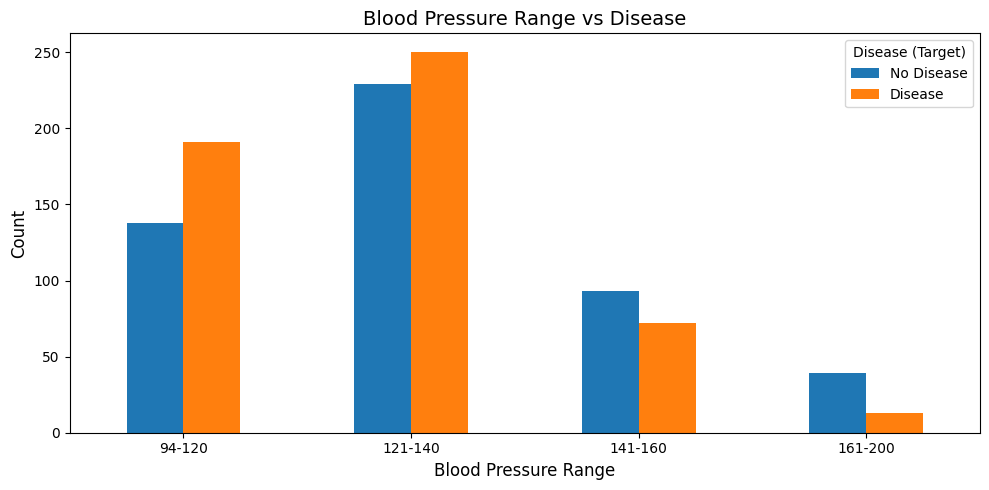

In [13]:
# Plot bar chart
disease_counts.plot(kind='bar', stacked=False, figsize=(10, 5))

# Add title and labels
plt.title('Blood Pressure Range vs Disease', fontsize=14)
plt.xlabel('Blood Pressure Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='Disease (Target)', labels=['No Disease', 'Disease'], fontsize=10)
plt.tight_layout()

# Display plot
plt.show()

target    0    1
cp              
0       375  122
1        33  134
2        65  219
3        26   51


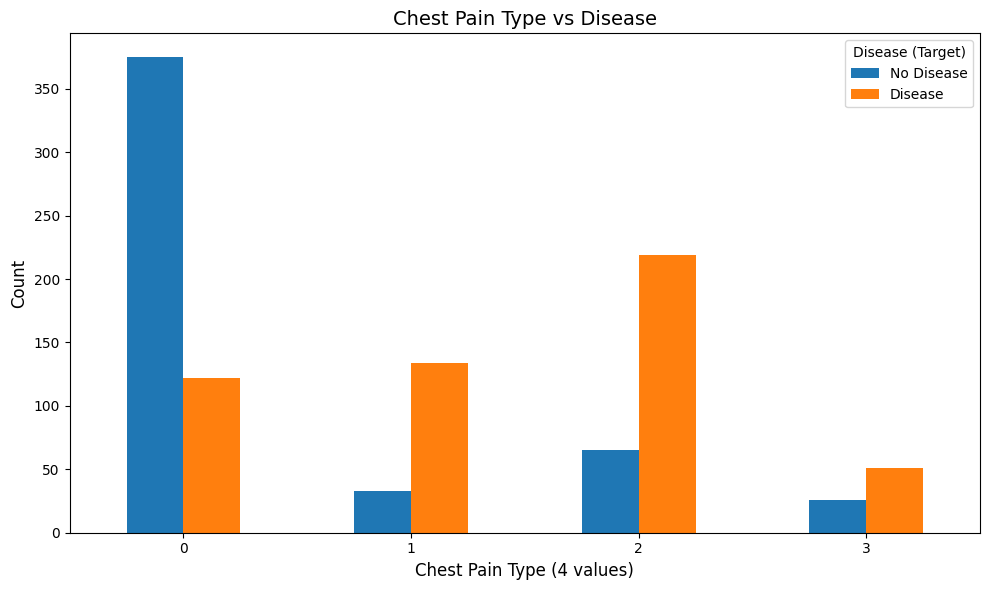

In [14]:
# Count of disease occurrences by chest pain type and target
disease_counts = df.groupby(['cp', 'target']).size().unstack()

# Plot bar chart
disease_counts.plot(kind='bar', stacked=False, figsize=(10, 6))
print(disease_counts)

# Add title and labels
plt.title('Chest Pain Type vs Disease', fontsize=14)
plt.xlabel('Chest Pain Type (4 values)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='Disease (Target)', labels=['No Disease', 'Disease'], fontsize=10)
plt.tight_layout()

# Display plot
plt.show()

In [15]:
# Create blood pressure (trestbps) ranges
bins = [126, 180, 234, 288, 342, 396, 450, 504, 564]  # Define range bins
labels = ['126-179', '180-233', '234-287', '288-341', '342-395', '396-449', '450-503', '504-564']  # Corresponding labels

df2 = pd.DataFrame()
df2['cholestoral_range'] = pd.cut(df['chol'], bins=bins, labels=labels, include_lowest=True)
df2['target'] = df['target']
print(df2)

# Count of disease occurrences by blood pressure range and target
disease_counts = df2.groupby(['cholestoral_range', 'target'], observed=False).size().unstack()
print(disease_counts)

     cholestoral_range  target
0              180-233       0
1              180-233       0
2              126-179       0
3              180-233       0
4              288-341       0
...                ...     ...
1020           180-233       1
1021           234-287       0
1022           234-287       0
1023           234-287       1
1024           180-233       0

[1025 rows x 2 columns]
target               0    1
cholestoral_range          
126-179             40   44
180-233            164  228
234-287            188  171
288-341             96   68
342-395              4    9
396-449              7    3
450-503              0    0
504-564              0    3


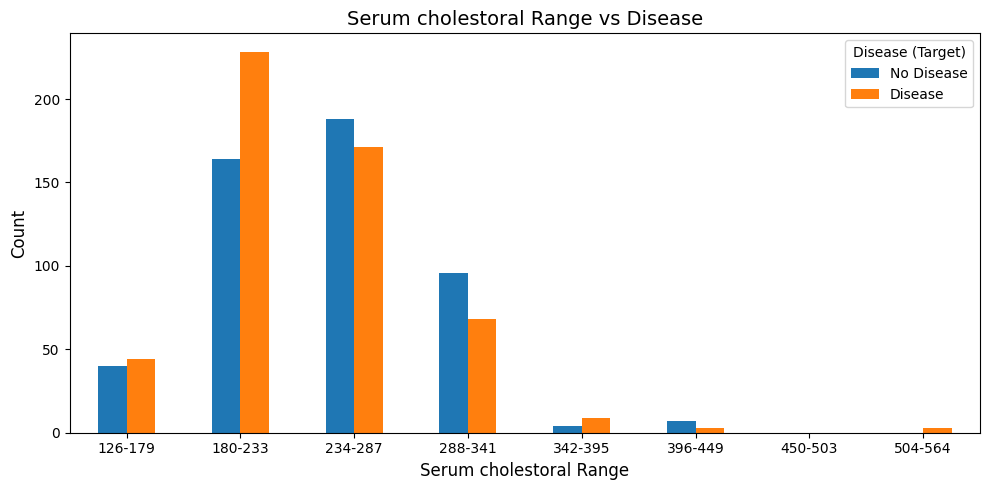

In [16]:
# Plot bar chart
disease_counts.plot(kind='bar', stacked=False, figsize=(10, 5))

# Add title and labels
plt.title('Serum cholestoral Range vs Disease', fontsize=14)
plt.xlabel('Serum cholestoral Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='Disease (Target)', labels=['No Disease', 'Disease'], fontsize=10)
plt.tight_layout()

# Display plot
plt.show()

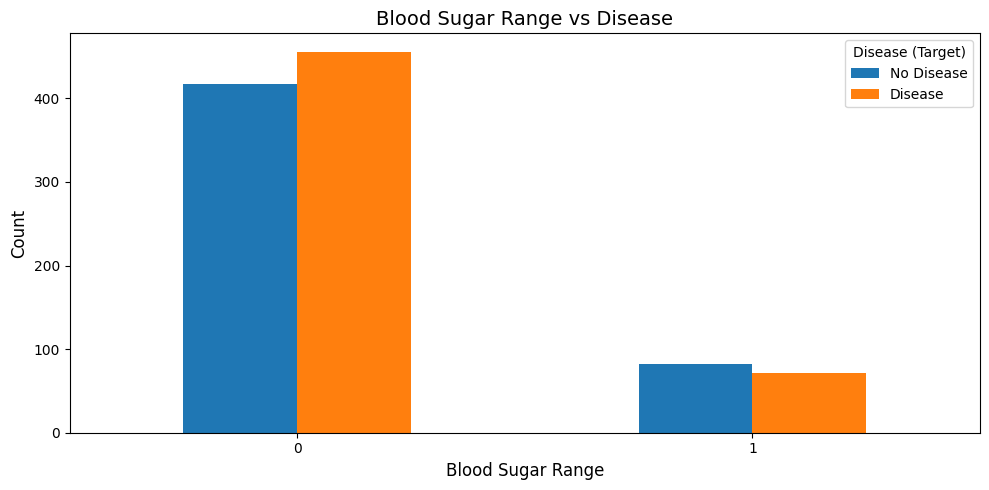

In [17]:
# Count of disease occurrences by blood pressure range and target
disease_counts = df.groupby(['fbs', 'target']).size().unstack()

# Plot bar chart
disease_counts.plot(kind='bar', stacked=False, figsize=(10, 5))

# Add title and labels
plt.title('Blood Sugar Range vs Disease', fontsize=14)
plt.xlabel('Blood Sugar Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='Disease (Target)', labels=['No Disease', 'Disease'], fontsize=10)
plt.tight_layout()

# Display plot
plt.show()

<Axes: >

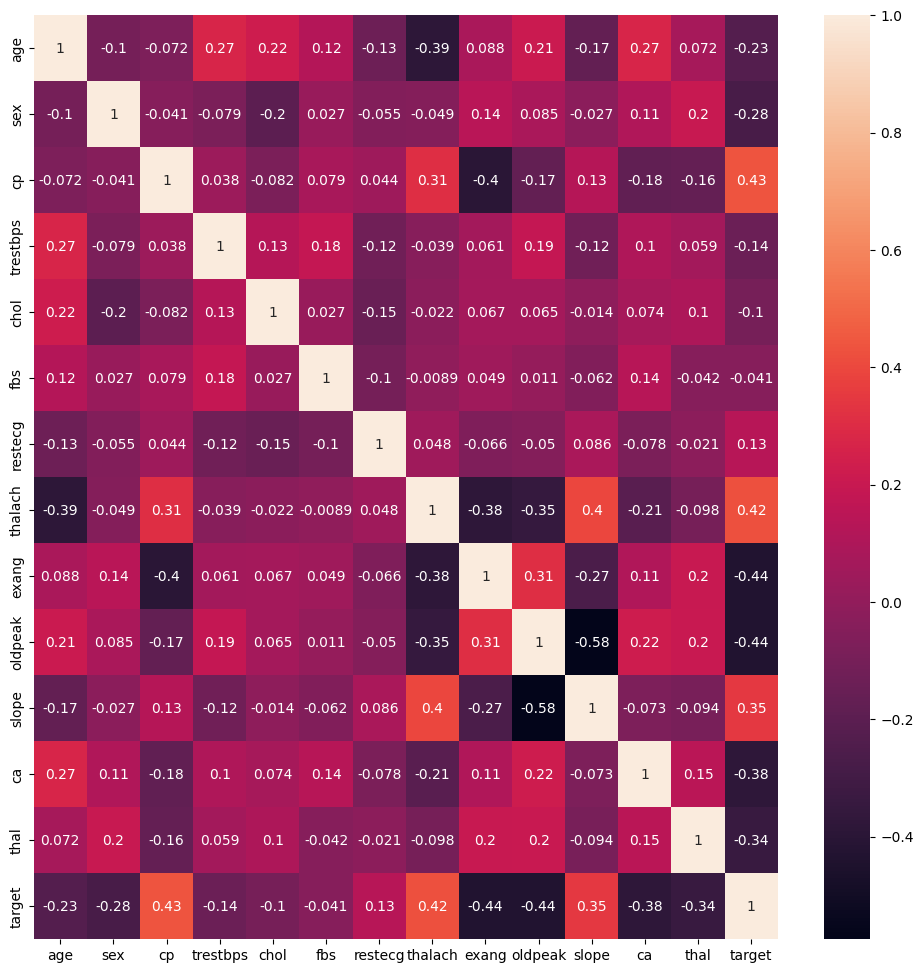

In [18]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True)

#### Feature Extraction and Train- Test split

In [19]:
df['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [20]:
df['fbs'].unique()

array([0, 1], dtype=int64)

In [21]:
df['restecg'].unique()

array([1, 0, 2], dtype=int64)

In [22]:
df['exang'].unique()

array([0, 1], dtype=int64)

In [23]:
df['slope'].unique()

array([2, 0, 1], dtype=int64)

In [24]:
df['ca'].unique()

array([2, 0, 1, 3, 4], dtype=int64)

In [25]:
df['thal'].unique()

array([3, 2, 1, 0], dtype=int64)

In [26]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ohe_encoder = OneHotEncoder(drop='first')
standard_scaler = StandardScaler()

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

num_cols = [feature for feature in df.columns if feature not in categorical_cols+['target']]
num_cols
# categorical_cols

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', ohe_encoder, categorical_cols),
        ('StandardScaler', standard_scaler, num_cols)
    ]
)

In [27]:
num_cols
# categorical_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [28]:
# Splitting the features and target

from sklearn.model_selection import train_test_split

x = df.drop(columns='target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [29]:
X_train = preprocessor.fit_transform(X_train)
X_train

array([[ 1.        ,  0.        ,  1.        , ..., -1.93503098,
        -1.01909426, -0.21066121],
       [ 0.        ,  0.        ,  0.        , ...,  1.61063407,
         0.20288215, -0.91215236],
       [ 0.        ,  0.        ,  1.        , ...,  0.44217627,
         0.77022833, -0.91215236],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.08684264,
         1.03208042,  0.49082993],
       [ 1.        ,  0.        ,  0.        , ..., -0.68598988,
         0.50837625, -0.91215236],
       [ 1.        ,  0.        ,  0.        , ..., -0.30321922,
         0.46473423, -0.91215236]])

In [30]:
X_test = preprocessor.transform(X_test)
X_test

array([[ 0.        ,  0.        ,  0.        , ..., -0.72628153,
         0.59566027, -0.91215236],
       [ 0.        ,  0.        ,  1.        , ..., -0.58526076,
        -1.49915642, -0.91215236],
       [ 1.        ,  0.        ,  0.        , ...,  0.8853844 ,
        -0.18989598, -0.21066121],
       ...,
       [ 1.        ,  0.        ,  1.        , ..., -0.38380252,
         0.85751236, -0.91215236],
       [ 1.        ,  0.        ,  0.        , ..., -0.76657318,
        -0.49539009,  0.75388911],
       [ 1.        ,  0.        ,  1.        , ..., -0.30321922,
         0.6829443 ,  1.28000747]])

In [31]:
X_train.shape, X_test.shape

((820, 22), (205, 22))

#### Training and Testing with different models

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [33]:
models_1 = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic': LogisticRegression(),
    'SVM': SVC()
}

models_1

{'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'KNN': KNeighborsClassifier(),
 'Logistic': LogisticRegression(),
 'SVM': SVC()}

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

def evaluate_model(true, predict):
    accuracy = accuracy_score(true, predict)
    precision = precision_score(true, predict)
    recall = recall_score(true, predict)
    matrix = confusion_matrix(true, predict)

    return accuracy, precision, recall, matrix

In [35]:
for i in range(len(list(models_1))):
    model = list(models_1.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f'----- Model: {list(models_1.keys())[i]} -----')

    X_train_accuracy, X_train_precision, X_train_recall, X_train_matrix = evaluate_model(y_train, y_train_pred)
    X_test_accuracy, X_test_precision, X_test_recall, X_test_matrix = evaluate_model(y_test, y_test_pred)

    print('\n Model Training Performance:')
    print(f'Accuracy: {X_train_accuracy:.3f}')
    print(f'Precision: {X_train_precision:.3f}')
    print(f'Recall: {X_train_recall:.3f}')
    print('Confusion matrix: \n', X_train_matrix)

    print('\n Model Test Performance:')
    print(f'Accuracy: {X_test_accuracy:.3f}')
    print(f'Precision: {X_test_precision:.3f}')
    print(f'Recall: {X_test_recall:.3f}')
    print('Confusion matrix: \n', X_test_matrix)

    print("="*35)

----- Model: Decision Tree -----

 Model Training Performance:
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
Confusion matrix: 
 [[397   0]
 [  0 423]]

 Model Test Performance:
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
Confusion matrix: 
 [[102   0]
 [  0 103]]
----- Model: Random Forest -----

 Model Training Performance:
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
Confusion matrix: 
 [[397   0]
 [  0 423]]

 Model Test Performance:
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
Confusion matrix: 
 [[102   0]
 [  0 103]]
----- Model: KNN -----

 Model Training Performance:
Accuracy: 0.937
Precision: 0.939
Recall: 0.939
Confusion matrix: 
 [[371  26]
 [ 26 397]]

 Model Test Performance:
Accuracy: 0.790
Precision: 0.763
Recall: 0.845
Confusion matrix: 
 [[75 27]
 [16 87]]
----- Model: Logistic -----

 Model Training Performance:
Accuracy: 0.888
Precision: 0.872
Recall: 0.917
Confusion matrix: 
 [[340  57]
 [ 35 388]]

 Model Test Performance:
Accuracy: 0.820
Precision: 0.780


#### Hyperparameter Tuning using RandomizedSearchCV

In [36]:
decision_param = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 3, 4, 7, 9, 10],
    'min_samples_split': [2, 8, 15, 20]
}
decision_param

{'criterion': ['gini', 'entropy', 'log_loss'],
 'max_depth': [2, 3, 4, 7, 9, 10],
 'min_samples_split': [2, 8, 15, 20]}

In [37]:
randomForest_params = {
    'n_estimators': [80, 110, 140, 150],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3, 5, 7, 8, 9],
    'min_samples_split': [14, 23, 13, 25]
}
randomForest_params

{'n_estimators': [80, 110, 140, 150],
 'criterion': ['gini', 'entropy', 'log_loss'],
 'max_depth': [3, 5, 7, 8, 9],
 'min_samples_split': [14, 23, 13, 25]}

In [38]:
knn_params = {
    'n_neighbors': [3, 4, 5, 7, 9],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn_params

{'n_neighbors': [3, 4, 5, 7, 9],
 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [39]:
logistic_params = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}
logistic_params

{'penalty': ['l1', 'l2', 'elasticnet', None],
 'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga']}

In [40]:
cv_models = [
    ('Decision Tree', DecisionTreeClassifier(), decision_param),
    ('Random Forest', RandomForestClassifier(), randomForest_params),
    ('Logistic', LogisticRegression(), logistic_params),
    ('KNN', KNeighborsClassifier(), knn_params)
]

cv_models

[('Decision Tree',
  DecisionTreeClassifier(),
  {'criterion': ['gini', 'entropy', 'log_loss'],
   'max_depth': [2, 3, 4, 7, 9, 10],
   'min_samples_split': [2, 8, 15, 20]}),
 ('Random Forest',
  RandomForestClassifier(),
  {'n_estimators': [80, 110, 140, 150],
   'criterion': ['gini', 'entropy', 'log_loss'],
   'max_depth': [3, 5, 7, 8, 9],
   'min_samples_split': [14, 23, 13, 25]}),
 ('Logistic',
  LogisticRegression(),
  {'penalty': ['l1', 'l2', 'elasticnet', None],
   'solver': ['lbfgs',
    'liblinear',
    'newton-cg',
    'newton-cholesky',
    'sag',
    'saga']}),
 ('KNN',
  KNeighborsClassifier(),
  {'n_neighbors': [3, 4, 5, 7, 9],
   'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']})]

In [41]:
import warnings
warnings.filterwarnings("ignore")

In [42]:

from sklearn.model_selection import RandomizedSearchCV

model_params = {}

for name, model, params in cv_models:
    random = RandomizedSearchCV(
                estimator=model,
                param_distributions=params,
                n_iter=100,
                cv=3, verbose=2, n_jobs=-1
            )
    
    random.fit(X_train, y_train)
    model_params[name] = random.best_params_

model_params


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits


{'Decision Tree': {'min_samples_split': 2,
  'max_depth': 10,
  'criterion': 'log_loss'},
 'Random Forest': {'n_estimators': 80,
  'min_samples_split': 13,
  'max_depth': 9,
  'criterion': 'log_loss'},
 'Logistic': {'solver': 'lbfgs', 'penalty': 'l2'},
 'KNN': {'n_neighbors': 5, 'algorithm': 'auto'}}

In [43]:
for model_name in model_params:
    print(f'-------- Best params for {model_name} -----------')
    print(model_params[model_name], '\n')

-------- Best params for Decision Tree -----------
{'min_samples_split': 2, 'max_depth': 10, 'criterion': 'log_loss'} 

-------- Best params for Random Forest -----------
{'n_estimators': 80, 'min_samples_split': 13, 'max_depth': 9, 'criterion': 'log_loss'} 

-------- Best params for Logistic -----------
{'solver': 'lbfgs', 'penalty': 'l2'} 

-------- Best params for KNN -----------
{'n_neighbors': 5, 'algorithm': 'auto'} 



In [49]:
models_2 = {
    'Decision Tree': DecisionTreeClassifier(
        min_samples_split=2, max_depth=10, criterion='log_loss'
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=80, min_samples_split=13, max_depth=9, criterion='log_loss'
    ),
    'Logistic': LogisticRegression(
        solver='lbfgs', penalty='l2'
    ),
    'KNN': KNeighborsClassifier(
        n_neighbors=5, algorithm='auto'
    )
}

models_2

{'Decision Tree': DecisionTreeClassifier(criterion='log_loss', max_depth=10),
 'Random Forest': RandomForestClassifier(criterion='log_loss', max_depth=9, min_samples_split=13,
                        n_estimators=80),
 'Logistic': LogisticRegression(),
 'KNN': KNeighborsClassifier()}

In [50]:
for i in range(len(list(models_2))):
    model = list(models_2.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f'----- Model: {list(models_2.keys())[i]} -----')

    X_train_accuracy, X_train_precision, X_train_recall, X_train_matrix = evaluate_model(y_train, y_train_pred)
    X_test_accuracy, X_test_precision, X_test_recall, X_test_matrix = evaluate_model(y_test, y_test_pred)

    print('\n Model Training Performance:')
    print(f'Accuracy: {X_train_accuracy:.3f}')
    print(f'Precision: {X_train_precision:.3f}')
    print(f'Recall: {X_train_recall:.3f}')
    print('Confusion matrix: \n', X_train_matrix)

    print('\n Model Test Performance:')
    print(f'Accuracy: {X_test_accuracy:.3f}')
    print(f'Precision: {X_test_precision:.3f}')
    print(f'Recall: {X_test_recall:.3f}')
    print('Confusion matrix: \n', X_test_matrix)

    print("="*35)

----- Model: Decision Tree -----

 Model Training Performance:
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
Confusion matrix: 
 [[397   0]
 [  0 423]]

 Model Test Performance:
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
Confusion matrix: 
 [[102   0]
 [  0 103]]
----- Model: Random Forest -----

 Model Training Performance:
Accuracy: 0.979
Precision: 0.981
Recall: 0.979
Confusion matrix: 
 [[389   8]
 [  9 414]]

 Model Test Performance:
Accuracy: 0.917
Precision: 0.898
Recall: 0.942
Confusion matrix: 
 [[91 11]
 [ 6 97]]
----- Model: Logistic -----

 Model Training Performance:
Accuracy: 0.888
Precision: 0.872
Recall: 0.917
Confusion matrix: 
 [[340  57]
 [ 35 388]]

 Model Test Performance:
Accuracy: 0.820
Precision: 0.780
Recall: 0.893
Confusion matrix: 
 [[76 26]
 [11 92]]
----- Model: KNN -----

 Model Training Performance:
Accuracy: 0.937
Precision: 0.939
Recall: 0.939
Confusion matrix: 
 [[371  26]
 [ 26 397]]

 Model Test Performance:
Accuracy: 0.790
Precision: 0.763
Reca

#### Converting Random Forest Model, preprocessor columnTransformer into pickle file

In [56]:
finalModel = models_2['Random Forest']
finalModel

RandomForestClassifier(criterion='log_loss', max_depth=9, min_samples_split=13,
                       n_estimators=80)

In [57]:
import pickle
pickle.dump(preprocessor, open('./models/columnTransformer.pkl', 'wb'))
pickle.dump(finalModel, open('./models/RandomorestModel.pkl', 'wb'))

#### Testing with own values

In [54]:
inputs = [57, 1, 0, 150, 276, 0, 0, 112, 1, 0, 1, 1, 1]
inputs_reshaped = np.array(inputs).reshape(1, -1)

columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']

In [55]:
new_df = pd.DataFrame(data=inputs_reshaped, columns=columns)
new_scaled_data = preprocessor.transform(new_df)
pd.DataFrame(new_scaled_data)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.287396,1.037932,0.623489,-1.630082,-0.912152


In [58]:
y_pred = finalModel.predict(new_scaled_data)
y_pred

array([0], dtype=int64)